### **Quantium Virtual Internship - Retail Strategy and Analytics**

#### **Part 1: Data Preparation & Customer Analytics**

You are a data analyst at Quantium, a data science and advisory firm. A major retail client has provided two datasets:

- Transaction data – records of chip purchases over 1 year

- Customer data – customer demographic and purchasing behavior segments

Your task is to:

- Prepare and clean the data

- Perform customer analytics

- Identify high-value customer segments

- Provide insights to help improve **chip sales** and marketing strategies

## **1. Data Importation**

In [162]:
# Load the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [163]:
# import the datasets
transactionData = pd.read_csv('QVI_transaction_data.csv')
customerData = pd.read_csv('QVI_purchase_behaviour.csv')

## **2. Exploratory data analysis**

Let’s take a look at each of the datasets provided.  
Examining transaction data:

In [164]:
print(transactionData.info())
transactionData.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB
None


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


As can be seen from the `Date` column, the client  may have formatted the date in Excel to integer date and is based on numbered days originating from `1899-12-30`. Let's change the format to the standard `YYYY-MM-DD`.

In [165]:
# Change the date format.
transactionData['DATE'] = pd.to_datetime(transactionData['DATE'], origin='1899-12-30', unit='D')
print(transactionData.info())
transactionData.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB
None


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


Our target product type is chips (all brands), let's explore the other products in the `PROD_NAME` column.

In [166]:
# Count the number of unique products
transactionData["PROD_NAME"].nunique()

114

In [167]:
# how many of each product were sold
transactionData["PROD_NAME"].value_counts()

PROD_NAME
Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: count, Length: 114, dtype: int64

We are looking for potato chips, how can we check that these are all chips? We can do some basic text analysis by summarising the individual words in the product name.

In [168]:
# Get unique product names
unique_prods = transactionData["PROD_NAME"].unique()

# Split each into words, flatten, and keep only alphabetic characters
all_words = []
for prod in unique_prods:
    words = prod.split()
    # exclude non-alphabetic words
    words = [word for word in words if word.isalpha()]
    # extend the main list
    all_words.extend(words)

# Create a Series and count word frequencies
word_counts = pd.Series(all_words).value_counts()
print("Unique word counts:", len(word_counts))
word_counts.head(20)

Unique word counts: 168


Chips       21
Smiths      16
Crinkle     14
Cut         14
Kettle      13
Salt        12
Cheese      12
Original    10
Doritos      9
Chip         9
Salsa        9
Corn         8
Pringles     8
RRD          8
Chicken      7
WW           7
Sea          6
Sour         6
Thinly       5
Crisps       5
Name: count, dtype: int64

Most these words are either variations of chip-related products or they're chip brands. However, some of the products like Salsa are not chips at all and shouldn't be included in the analysis (chicken most of the times is purchased together with chips). Let's filter the dataset by removing salsa products. 

In [169]:
# find salsa products
salsa_prods = transactionData["PROD_NAME"].str.contains("salsa", case=False)
print("No. of Salsa products:", salsa_prods.sum())

# non-salsa products
print("No. of chip products:", len(transactionData[~salsa_prods]))

No. of Salsa products: 18094
No. of chip products: 246742


In [170]:
# Filter the dataset to include only chip products
transactionData = transactionData[~salsa_prods]
transactionData.shape

(246742, 8)

Let's check the summary statistics of the whole transaction data.

In [171]:
transactionData.describe().round(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742,246742.00,246742.00,246742.00,246742.00,246742.00,246742.00
mean,2018-12-30 01:19:01.211467520,135.05,135530.98,135131.10,56.35,1.91,7.32
min,2018-07-01 00:00:00,1.00,1000.00,1.00,1.00,1.00,1.70
25%,2018-09-30 00:00:00,70.00,70015.00,67569.25,26.00,2.00,5.80
50%,2018-12-30 00:00:00,130.00,130367.00,135183.00,53.00,2.00,7.40
75%,2019-03-31 00:00:00,203.00,203084.00,202653.75,87.00,2.00,8.80
max,2019-06-30 00:00:00,272.00,2373711.00,2415841.00,114.00,200.00,650.00
std,NaN,76.79,80715.28,78147.72,33.70,0.66,3.08


In [172]:
# Check for missing values on each column
transactionData.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

There are no nulls in the columns but product quantity appears to have an outlier which we should investigate further. Let’s investigate further the case where 200 packets of chips are bought in one transaction.

In [173]:
# Filter the dataset to find the outlier
transactionData[transactionData["PROD_QTY"] == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


There are two transactions where 200 packets of chips are bought in one transaction and both of these transactions were by the same customer.

In [174]:
# Let's see if the customer has had other transactions
transactionData[transactionData["LYLTY_CARD_NBR"] == 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


It looks like this customer has only had the two transactions over the year and is not an ordinary retail customer. The customer might be buying chips for commercial purposes instead. We’ll remove this loyalty card number from further analysis.

In [175]:
# Filter out the customer based on the loyalty card number
transactionData = transactionData[transactionData["LYLTY_CARD_NBR"] != 226000]

# Re‐examine transaction data
transactionData.describe().round(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246740,246740.00,246740.00,246740.00,246740.00,246740.00,246740.00
mean,2018-12-30 01:18:58.448569344,135.05,135530.25,135130.36,56.35,1.91,7.32
min,2018-07-01 00:00:00,1.00,1000.00,1.00,1.00,1.00,1.70
25%,2018-09-30 00:00:00,70.00,70015.00,67568.75,26.00,2.00,5.80
50%,2018-12-30 00:00:00,130.00,130367.00,135181.50,53.00,2.00,7.40
75%,2019-03-31 00:00:00,203.00,203083.25,202652.25,87.00,2.00,8.80
max,2019-06-30 00:00:00,272.00,2373711.00,2415841.00,114.00,5.00,29.50
std,NaN,76.79,80715.20,78147.60,33.70,0.34,2.47


Now, let’s look at the number of transaction lines over time to see if there are any missing date during the annual transaction period.

In [176]:
print("Number of unique dates:", transactionData["DATE"].nunique())
Date_range = pd.date_range(start=transactionData["DATE"].min(), end=transactionData["DATE"].max())
print("Number of days in the transaction period:", len(Date_range))

Number of unique dates: 364
Number of days in the transaction period: 365


There’s only 364 unique dates instead of 365, which indicates a missing date, and considering 2019 wasn't a leap year. Let’s visualize the date sequence by month.

In [177]:
# Create complete date range
all_dates = pd.DataFrame({'DATE': pd.date_range('2018-07-01', '2019-06-30')})

# Count transactions per day
daily_counts = transactionData.groupby('DATE').size().reset_index(name='Transaction_Count')

# Merge (left join) to include all dates
transactions_by_day = pd.merge(all_dates, daily_counts, on='DATE', how='left')

transactions_by_day.head()

,DATE,Transaction_Count
0,2018-07-01,663.0
1,2018-07-02,650.0
2,2018-07-03,674.0
3,2018-07-04,669.0
4,2018-07-05,660.0


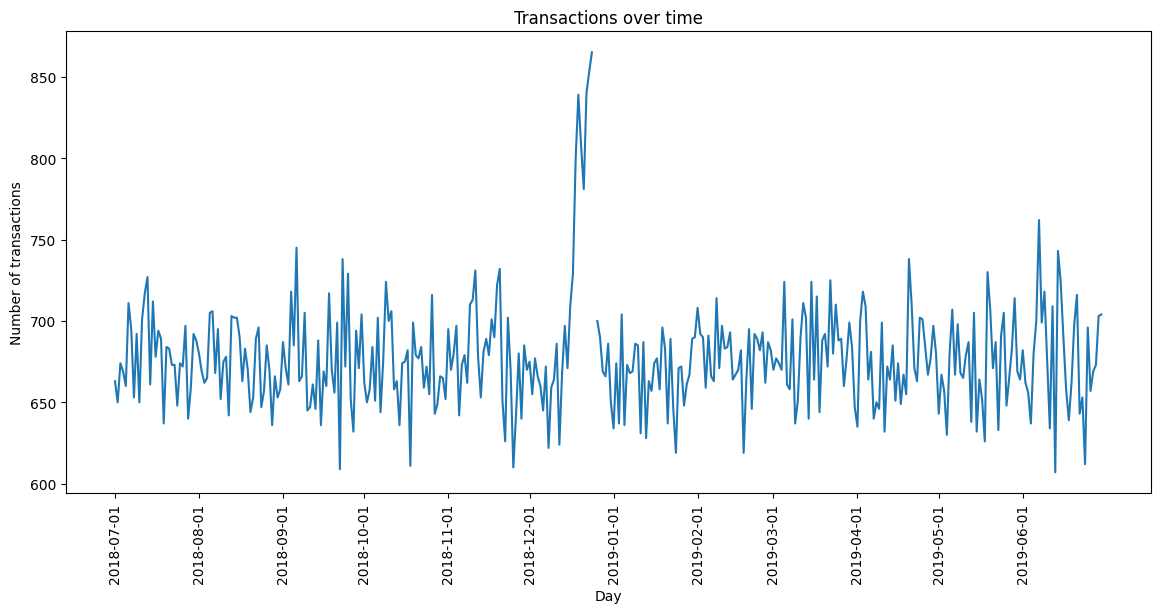

In [178]:
# Plot
plt.figure(figsize=(14, 6))
plt.plot(transactions_by_day['DATE'], transactions_by_day['Transaction_Count'])

# Monthly x-ticks
plt.xticks(pd.date_range('2018-07-01', '2019-06-30', freq='MS'), rotation=90)

plt.title('Transactions over time')
plt.xlabel('Day')
plt.ylabel('Number of transactions')
plt.show();

We can see that there is an increase in purchases in December and a break in late December. Let’s zoom in on this.

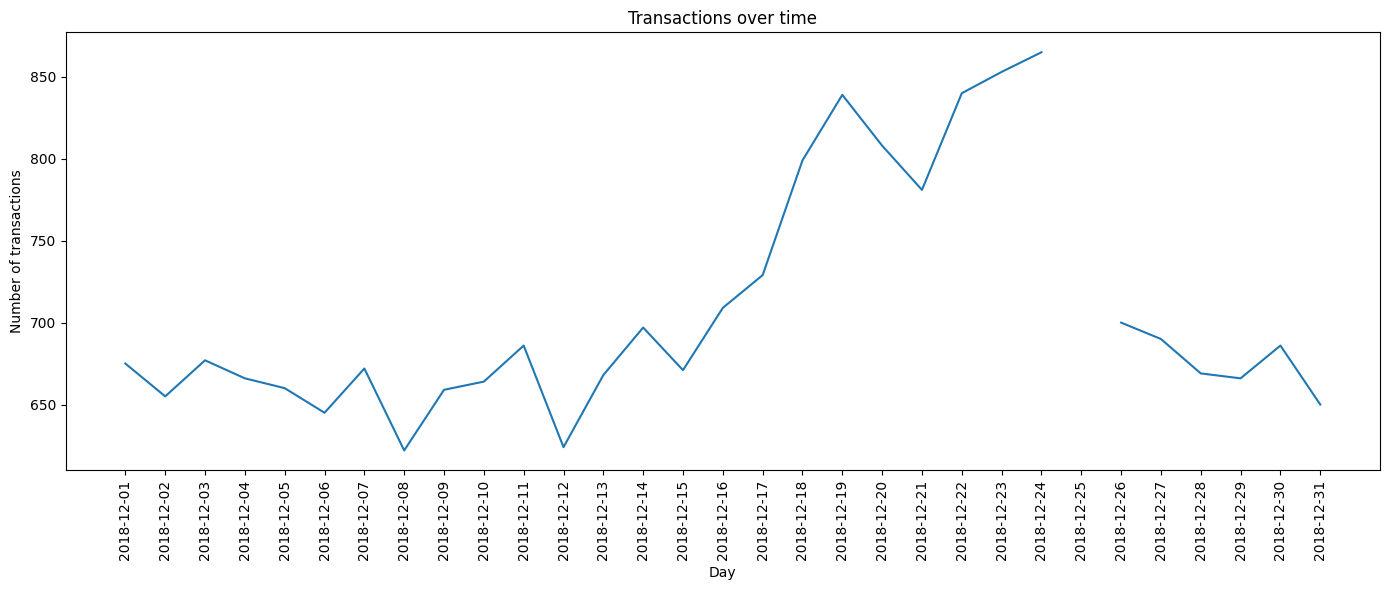

In [179]:
# Filter for December only
december_data = transactions_by_day[transactions_by_day['DATE'].dt.month == 12]

# Plot
plt.figure(figsize=(14, 6))
plt.plot(december_data['DATE'], december_data['Transaction_Count'])

# Set x-ticks to every day
plt.xticks(ticks=pd.date_range(start='2018-12-01', end='2018-12-31', freq='D'),
           rotation=90)

plt.title('Transactions over time')
plt.xlabel('Day')
plt.ylabel('Number of transactions')
plt.tight_layout()
plt.show()

In [180]:
december_data.tail(10)

,DATE,Transaction_Count
174,2018-12-22,840.0
175,2018-12-23,853.0
176,2018-12-24,865.0
177,2018-12-25,NaN
178,2018-12-26,700.0
179,2018-12-27,690.0
180,2018-12-28,669.0
181,2018-12-29,666.0
182,2018-12-30,686.0
183,2018-12-31,650.0


We can see that the increase in sales occurs in the lead-up to Christmas and that there are zero sales on Christmas day itself. This is due to shops being closed on Christmas day.
Now that we are satisfied that the data no longer has outliers, we can move on to creating other features such as brand of chips or pack size from PROD_NAME. Let's start with pack size.

In [181]:
# Extract pack size from PROD_NAME (get the numeric digits)
transactionData['PACK_SIZE'] = transactionData['PROD_NAME'].str.extract('(\d+)').astype(int)
transactionData.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150


In [182]:

# Check the unique pack sizes and their frequencies
pack_size_counts = transactionData['PACK_SIZE'].value_counts().sort_index().to_frame()

print(pack_size_counts)

           count
PACK_SIZE       
70          1507
90          3008
110        22387
125         1454
134        25102
135         3257
150        40203
160         2970
165        15297
170        19983
175        66390
180         1468
190         2995
200         4473
210         6272
220         1564
250         3169
270         6285
330        12540
380         6416


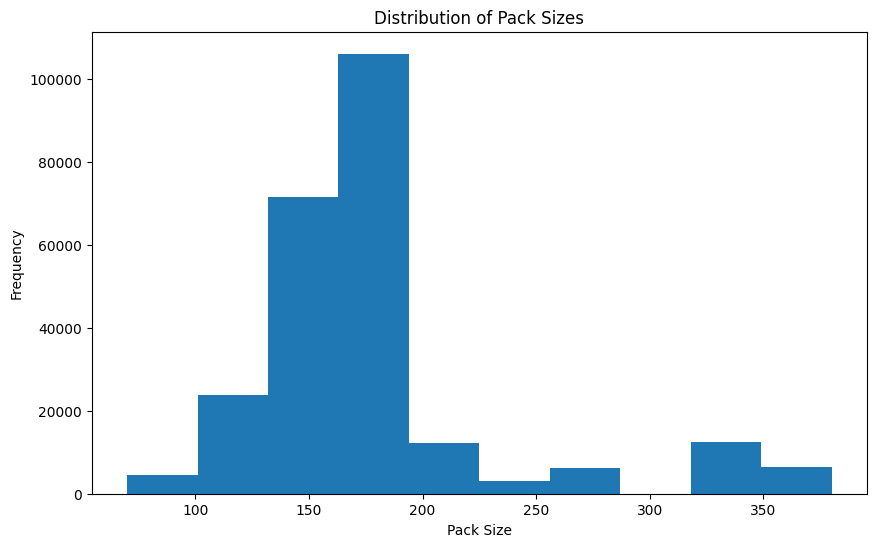

In [183]:
# visualize the distribution of pack sizes
transactionData["PACK_SIZE"].plot(kind='hist', figsize=(10, 6))
plt.title('Distribution of Pack Sizes')
plt.xlabel('Pack Size')
plt.ylabel('Frequency')
plt.show();

Pack sizes created look reasonable and now to create brands, we can use the first word in PROD_NAME to work out the brand name

In [184]:
# Extract brand name (first word before first space)
transactionData['BRAND'] = transactionData['PROD_NAME'].str.split().str[0].str.upper()

# Check brand frequencies, sorted from highest to lowest
transactionData['BRAND'].value_counts().sort_values(ascending=False)[:20]

BRAND
KETTLE       41288
SMITHS       27390
PRINGLES     25102
DORITOS      22041
THINS        14075
RRD          11894
INFUZIONS    11057
WW           10320
COBS          9693
TOSTITOS      9471
TWISTIES      9454
TYRRELLS      6442
GRAIN         6272
NATURAL       6050
CHEEZELS      4603
CCS           4551
RED           4427
DORITO        3183
INFZNS        3144
SMITH         2963
Name: count, dtype: int64

Some of the brand names look like they are of the same brands - such as RED and RRD, which are both Red Rock Deli chips. Also, DORITTOS is same with DORITTO, and there are many of this types of redundancies. Let’s combine these together.

In [185]:
# Clean brand names by replacing variations
brand_replacements = {
    "RED": "RRD",
    "SNBTS": "SUNBITES", 
    "INFZNS": "INFUZIONS",
    "WW": "WOOLWORTHS",
    "SMITH": "SMITHS",
    "NCC": "NATURAL",
    "DORITO": "DORITOS",
    "GRAIN": "GRNWVES"
}

# Apply the replacements
transactionData['BRAND'] = transactionData['BRAND'].replace(brand_replacements)

# Check brand frequencies again
transactionData['BRAND'].value_counts().sort_index()


BRAND
BURGER         1564
CCS            4551
CHEETOS        2927
CHEEZELS       4603
COBS           9693
DORITOS       25224
FRENCH         1418
GRNWVES        7740
INFUZIONS     14201
KETTLE        41288
NATURAL        7469
PRINGLES      25102
RRD           16321
SMITHS        30353
SUNBITES       3008
THINS         14075
TOSTITOS       9471
TWISTIES       9454
TYRRELLS       6442
WOOLWORTHS    11836
Name: count, dtype: int64

**Examining customer data**

Now that we are happy with the transaction dataset, let’s have a look at the customer dataset.

In [186]:
print(customerData.info())
customerData.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


Let’s have a closer look at the LIFESTAGE and PREMIUM_CUSTOMER columns.

In [187]:
customerData['LIFESTAGE'].value_counts()

LIFESTAGE
RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: count, dtype: int64

In [188]:
customerData["PREMIUM_CUSTOMER"].value_counts()

PREMIUM_CUSTOMER
Mainstream    29245
Budget        24470
Premium       18922
Name: count, dtype: int64

As there seem to be no any issues with the customer data, we can now go ahead and join the transaction and customer data sets together

In [189]:
data = pd.merge(transactionData, customerData, on='LYLTY_CARD_NBR', how='left')
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCS,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,SMITHS,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,SMITHS,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,KETTLE,MIDAGE SINGLES/COUPLES,Budget


In [190]:
data.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

There are no nulls, so all our customers in the transaction data has been accounted for in the customer dataset.
- Note that if you are continuing with Task 2, you may want to retain this dataset which you can write out as
a csv

In [191]:
try: 
    data.to_csv('QVI_cleaned_data.csv', index=False)
    print("Data saved successfully.")
except Exception as e:
    print("Error saving data:", e)

Data saved successfully.


## **3. Data analysis on customer segments**

Now that the data is ready for analysis, we can define some metrics of interest to the client:  
• Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is  
• How many customers are in each segment  
• How many chips are bought per customer by segment  
• What’s the average chip price by customer segment  

We could also ask our data team for more information. Examples are:  

• The customer’s total spend over the period and total spend for each transaction to understand what proportion of their grocery spend is on chips  
• Proportion of customers in each customer segment overall to compare against the mix of customers who purchase chips  

Let’s start with calculating total sales by LIFESTAGE and PREMIUM_CUSTOMER and plotting the split by
these segments to describe which customer segment contribute most to chip sales.

In [192]:
# Calculate total sales by LIFESTAGE and PREMIUM_CUSTOMER
sales = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index(name='SALES')

# Calculate proportion of total sales for each segment
sales['PROPORTION'] = (sales['SALES'] / sales['SALES'].sum() * 100).round(1)

# Create a pivot table for visualization
sales_pivot = sales.pivot_table(
    index='LIFESTAGE', 
    columns='PREMIUM_CUSTOMER', 
    values='PROPORTION'
)
sales_pivot

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,1.8,4.7,3.0
NEW FAMILIES,1.1,0.9,0.6
OLDER FAMILIES,8.7,5.3,4.2
OLDER SINGLES/COUPLES,7.1,6.9,6.8
RETIREES,5.9,8.0,5.1
YOUNG FAMILIES,7.2,4.8,4.4
YOUNG SINGLES/COUPLES,3.2,8.2,2.2


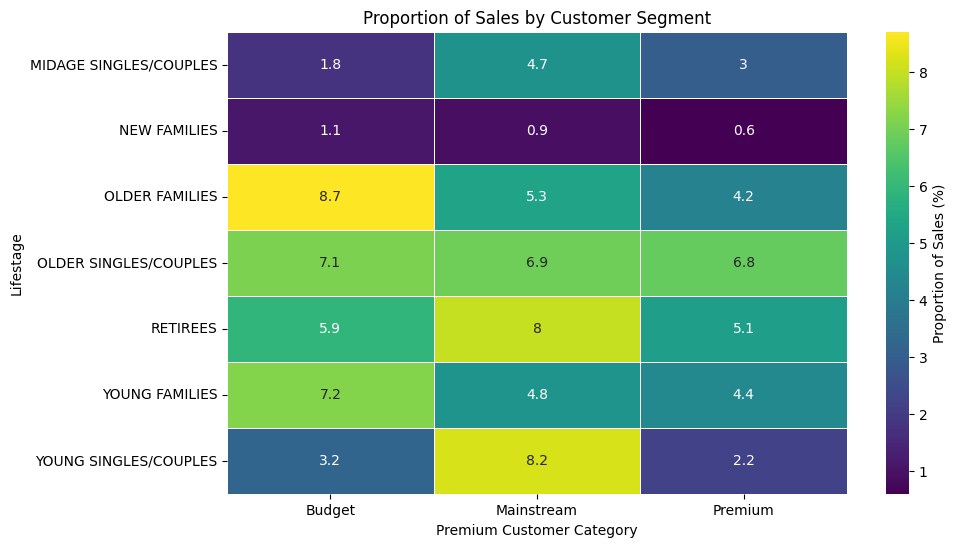

In [193]:
# visualize the correlation of sales proportions
plt.figure(figsize=(10, 6))
sns.heatmap(sales_pivot, annot=True, cmap='viridis', linewidths=0.5, cbar_kws={'label': 'Proportion of Sales (%)'})

plt.title('Proportion of Sales by Customer Segment')
plt.xlabel('Premium Customer Category')
plt.ylabel('Lifestage')
plt.show()


Sales are coming mainly from Budget - older families, Mainstream - young singles/couples, and Mainstream- retirees

Let’s see if the higher sales are due to there being more customers who buy chips.

In [194]:
# Count unique customers by LIFESTAGE and PREMIUM_CUSTOMER
customers = (data.groupby(
    ['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique()
    .reset_index(name='CUSTOMERS')
    .sort_values('CUSTOMERS', ascending=False))


# Calculate proportion of total customers
customers['PROPORTION'] = (customers['CUSTOMERS'] / customers['CUSTOMERS'].sum() * 100).round(1)

customers.head()

,LIFESTAGE,PREMIUM_CUSTOMER,CUSTOMERS,PROPORTION
19,YOUNG SINGLES/COUPLES,Mainstream,7917,11.1
13,RETIREES,Mainstream,6358,8.9
10,OLDER SINGLES/COUPLES,Mainstream,4858,6.8
9,OLDER SINGLES/COUPLES,Budget,4849,6.8
11,OLDER SINGLES/COUPLES,Premium,4682,6.6


In [195]:

# Create pivot table for visualization
customers_pivot = customers.pivot_table(
    index='LIFESTAGE', 
    columns='PREMIUM_CUSTOMER', 
    values='PROPORTION')

customers_pivot

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,2.1,4.6,3.3
NEW FAMILIES,1.5,1.2,0.8
OLDER FAMILIES,6.5,3.9,3.1
OLDER SINGLES/COUPLES,6.8,6.8,6.6
RETIREES,6.2,8.9,5.3
YOUNG FAMILIES,5.5,3.8,3.4
YOUNG SINGLES/COUPLES,5.1,11.1,3.5


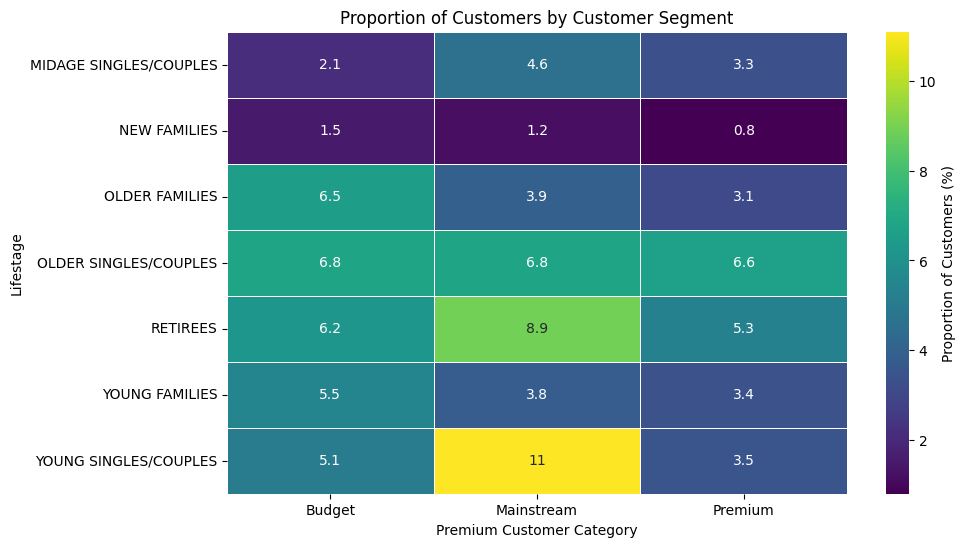

In [196]:

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(customers_pivot, annot=True, cmap='viridis', linewidths=0.5, cbar_kws={'label': 'Proportion of Customers (%)'})

plt.title('Proportion of Customers by Customer Segment')
plt.xlabel('Premium Customer Category')
plt.ylabel('Lifestage')
plt.show()


There are more Mainstream - young singles/couples and Mainstream - retirees who buy chips. This contributes to there being more sales to these customer segments but this is not a major driver for the Budget - Older families segment.

Higher sales may also be driven by more units of chips being bought per customer. Let’s have a look at this next.

In [197]:
# Calculate average units per customer by segment
avg_units = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).apply(
    lambda x: x['PROD_QTY'].sum() / x['LYLTY_CARD_NBR'].nunique()
).reset_index(name='AVG_UNITS')

# Sort by average units (descending)
avg_units = avg_units.sort_values('AVG_UNITS', ascending=False)

avg_units.head()

,LIFESTAGE,PREMIUM_CUSTOMER,AVG_UNITS
7,OLDER FAMILIES,Mainstream,9.255380
6,OLDER FAMILIES,Budget,9.076773
8,OLDER FAMILIES,Premium,9.071717
15,YOUNG FAMILIES,Budget,8.722995
17,YOUNG FAMILIES,Premium,8.716013


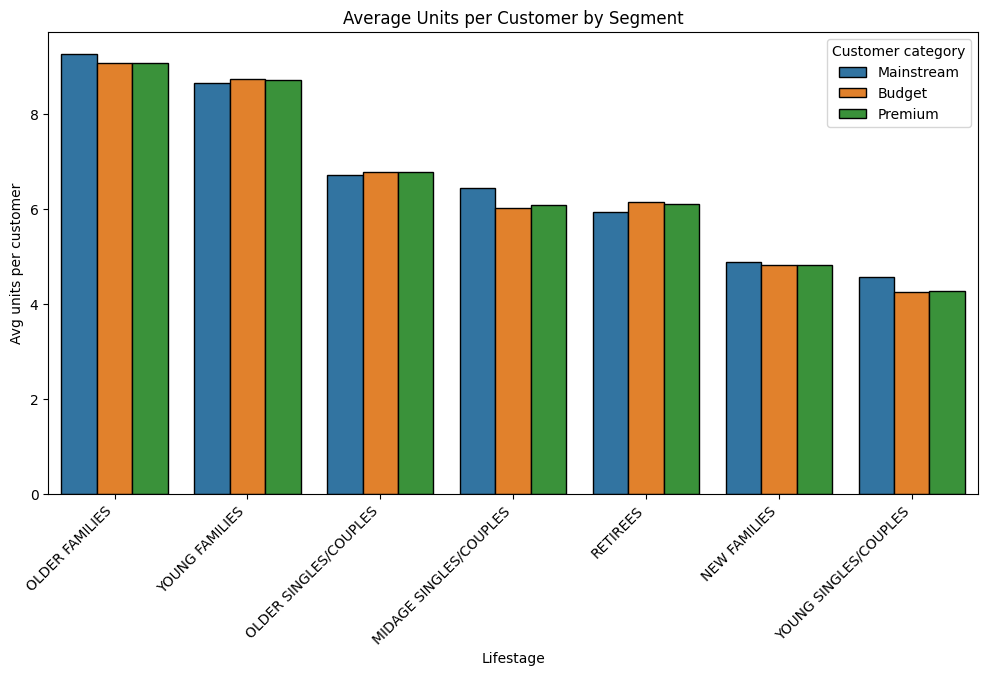

In [198]:

# Create grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_units, 
            x='LIFESTAGE', 
            y='AVG_UNITS', 
            hue='PREMIUM_CUSTOMER',
            edgecolor='black')

plt.title('Average Units per Customer by Segment')
plt.xlabel('Lifestage')
plt.ylabel('Avg units per customer')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Customer category')
plt.show()

Older families and young families in general buy more chips per customer. Let’s also investigate the average price per unit chips bought for each customer segment as this is also a driver of total sales.

In [199]:
# Calculate average price per unit by segment
avg_price = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).apply(
    lambda x: x['TOT_SALES'].sum() / x['PROD_QTY'].sum()
).reset_index(name='AVG_PRICE')

# Sort by average price (descending)
avg_price = avg_price.sort_values('AVG_PRICE', ascending=False)
avg_price.head()


,LIFESTAGE,PREMIUM_CUSTOMER,AVG_PRICE
19,YOUNG SINGLES/COUPLES,Mainstream,4.074043
1,MIDAGE SINGLES/COUPLES,Mainstream,3.994449
4,NEW FAMILIES,Mainstream,3.935887
12,RETIREES,Budget,3.932731
3,NEW FAMILIES,Budget,3.931969


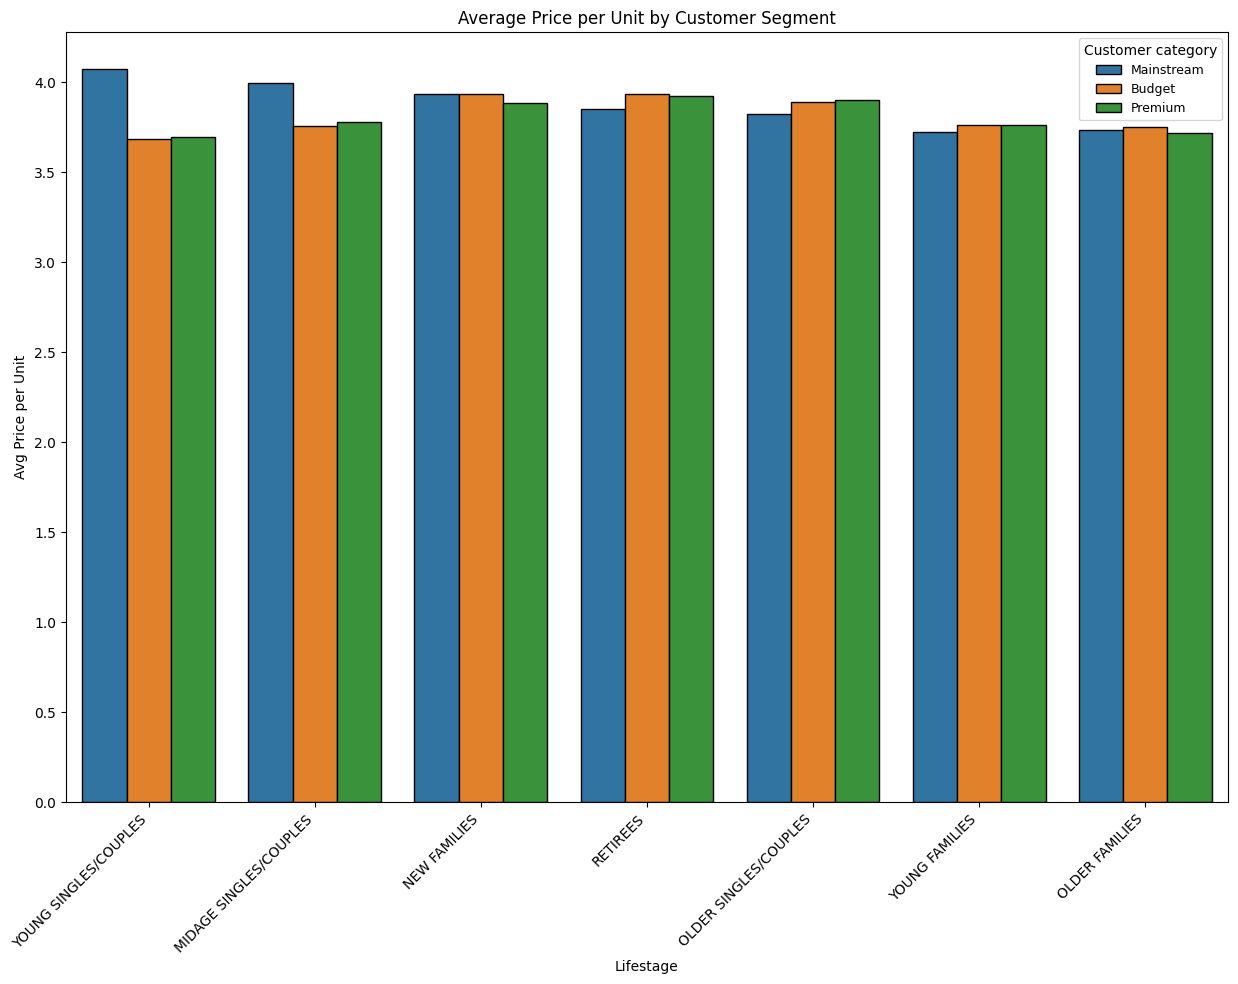

In [200]:
# Create grouped bar chart
plt.figure(figsize=(15, 10))
sns.barplot(data=avg_price, 
            x='LIFESTAGE', 
            y='AVG_PRICE', 
            hue='PREMIUM_CUSTOMER',
            edgecolor='black')

plt.title('Average Price per Unit by Customer Segment')
plt.xlabel('Lifestage')
plt.ylabel('Avg Price per Unit')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Customer category', fontsize=9)
plt.show()

Mainstream midage and young singles and couples are more willing to pay more per packet of chips compared to their budget and premium counterparts. This may be due to premium shoppers being more likely to buy healthy snacks and when they buy chips, and they mainly buy it for entertainment purposes rather than their own consumption. This is also supported by there being fewer premium midage and young singles and couples buying chips compared to their mainstream counterparts. As the difference in average price per unit isn’t large, we can check if this difference is statistically significant.

In [201]:
from scipy import stats

# Calculate price per unit
data['price'] = data['TOT_SALES'] / data['PROD_QTY']

# Filter data for mainstream customers
mainstream_data = data[
    (data['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES'])) &
    (data['PREMIUM_CUSTOMER'] == 'Mainstream')
]['price']

# Filter data for non-mainstream (budget + premium) customers
non_mainstream_data = data[
    (data['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES'])) &
    (data['PREMIUM_CUSTOMER'] != 'Mainstream')
]['price']


# Perform independent t-test (Welch's t-test)
t_stat, p_value = stats.ttest_ind(mainstream_data, non_mainstream_data, 
                                  equal_var=False, alternative='greater')

print("Welch's t-test results:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value}")
print(f"Mainstream mean: {round(mainstream_data.mean(), 4)}")
print(f"Non-mainstream mean: {round(non_mainstream_data.mean(), 4)}")

Welch's t-test results:
t-statistic: 37.6244
p-value: 3.4836771165090696e-306
Mainstream mean: 4.0398
Non-mainstream mean: 3.7065


The t-test results in a p-value < 3.4e-306, i.e. the unit price for mainstream, young and mid-age singles and couples are significantly higher than that of budget or premium, young and midage singles and couples.

**Deep dive into specific customer segments for insights**  
We have found quite a few interesting insights that we can dive deeper into. We might want to target customer segments that `contribute the most to sales `to retain them or further increase sales. Let’s look at Mainstream - young singles/couples. For instance, let’s find out if they tend to buy a particular brand of chips.

In [202]:
# Filter for Mainstream young singles/couples
segment1 = data[
    (data['LIFESTAGE'] == "YOUNG SINGLES/COUPLES") & 
    (data['PREMIUM_CUSTOMER'] == "Mainstream")
].copy()

# Filter for everyone else
other = data[
    ~((data['LIFESTAGE'] == "YOUNG SINGLES/COUPLES") & 
      (data['PREMIUM_CUSTOMER'] == "Mainstream"))
].copy()


# Calculate brand proportions for target segment
quantity_segment1_by_brand = segment1.groupby('BRAND')['PROD_QTY'].sum().reset_index()
quantity_segment1_by_brand['targetSegment'] = quantity_segment1_by_brand['PROD_QTY'] / segment1['PROD_QTY'].sum()

quantity_segment1_by_brand.tail()

,BRAND,PROD_QTY,targetSegment
15,THINS,2187,0.060373
16,TOSTITOS,1645,0.045411
17,TWISTIES,1673,0.046184
18,TYRRELLS,1143,0.031553
19,WOOLWORTHS,873,0.024099


In [203]:

# Calculate brand proportions for others
quantity_other_by_brand = other.groupby('BRAND')['PROD_QTY'].sum().reset_index()
quantity_other_by_brand['other'] = quantity_other_by_brand['PROD_QTY'] / other['PROD_QTY'].sum()

# Merge and calculate affinity
brand_proportions = pd.merge(
    quantity_segment1_by_brand[['BRAND', 'targetSegment']],
    quantity_other_by_brand[['BRAND', 'other']],
    on='BRAND'
)

brand_proportions['affinityToBrand'] = brand_proportions['targetSegment'] / brand_proportions['other']
brand_proportions = brand_proportions.sort_values('affinityToBrand', ascending=False)

brand_proportions

,BRAND,targetSegment,other,affinityToBrand
18,TYRRELLS,0.031553,0.025692,1.228095
17,TWISTIES,0.046184,0.037877,1.219319
5,DORITOS,0.122761,0.101075,1.214553
9,KETTLE,0.197985,0.165553,1.195897
16,TOSTITOS,0.045411,0.037978,1.195713
11,PRINGLES,0.119420,0.100635,1.186670
4,COBS,0.044638,0.039049,1.143124
8,INFUZIONS,0.064679,0.057065,1.133435
15,THINS,0.060373,0.056986,1.059423
7,GRNWVES,0.032712,0.031188,1.048873


We can see that:
- Mainstream young singles/couples are 23% more likely to purchase `Tyrrells` chips compared to the rest of the population
- Mainstream young singles/couples are 56% less likely to purchase `Burger` compared to the rest of the population


Let’s also find out if our target segment tends to buy larger packs of chips.

In [204]:
# Calculate pack size proportions for target segment
quantity_segment1_by_pack = segment1.groupby('PACK_SIZE')['PROD_QTY'].sum().reset_index()
quantity_segment1_by_pack['targetSegment'] = quantity_segment1_by_pack['PROD_QTY'] / segment1['PROD_QTY'].sum()

# pack size proportions for others
quantity_other_by_pack = other.groupby('PACK_SIZE')['PROD_QTY'].sum().reset_index()
quantity_other_by_pack['other'] = quantity_other_by_pack['PROD_QTY'] / other['PROD_QTY'].sum()

# Merge and calculate affinity to pack size
pack_proportions = pd.merge(
    quantity_segment1_by_pack[['PACK_SIZE', 'targetSegment']],
    quantity_other_by_pack[['PACK_SIZE', 'other']],
    on='PACK_SIZE'
)

pack_proportions['affinityToPack'] = pack_proportions['targetSegment'] / pack_proportions['other']
pack_proportions = pack_proportions.sort_values('affinityToPack', ascending=False)

pack_proportions

,PACK_SIZE,targetSegment,other,affinityToPack
17,270,0.031829,0.025096,1.268287
19,380,0.032160,0.025584,1.257030
18,330,0.061284,0.050162,1.221717
4,134,0.119420,0.100635,1.186670
2,110,0.106280,0.089791,1.183637
14,210,0.029124,0.025121,1.159318
5,135,0.014769,0.013075,1.129511
16,250,0.014355,0.012781,1.123166
9,170,0.080773,0.080986,0.997370
6,150,0.157598,0.163421,0.964372


It seems Mainstream young singles/couples are 27% more likely to purchase a 270g pack of chips compared to the rest of the population but let’s dive into what brands sell this pack size.

In [205]:
data[data["PACK_SIZE"] == 270]["PROD_NAME"].value_counts()

PROD_NAME
Twisties Chicken270g        3170
Twisties Cheese     270g    3115
Name: count, dtype: int64

Twisties are the only brand offering 270g packs and so this may instead be reflecting a higher likelihood of purchasing Twisties.

### **Conclusion**
1. Sales have mainly been due to Budget - older families, Mainstream - young singles/couples, and Mainstream - retirees shoppers. 
2. The high spend in chips for mainstream young singles/couples and retirees is due to there being more of them than other buyers. Mainstream, midage and young singles and couples are also more likely to pay more per packet of chips. This is indicative of impulse buying behaviour.
3. Mainstream young singles and couples are 23% more likely to purchase Tyrrells chips compared to the rest of the population. The Category Manager may want to increase the category’s performance by off-locating some Tyrrells and smaller packs of chips in discretionary space near segments where young singles and couples frequent more often to increase visibilty and impulse behaviour.
